## Youtube Data Analysis Using Spark

### Rudri Jani 

### Riya Shah

## Mount file

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
path = "/content/drive/My Drive/BDA_Project/Data_Youtube/"
path

'/content/drive/My Drive/BDA_Project/Data_Youtube/'

## import Libraries

In [ ]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

## Load Data 

In [ ]:
gb = pd.read_csv(path + "/GBvideos.csv")
gb['country'] = 'Britain'

ind = pd.read_csv(path + "/INvideos.csv")
ind['country'] = 'India'

us = pd.read_csv(path + "/USvideos.csv")
us['country'] = 'US'

ca = pd.read_csv(path + "/CAvideos.csv")
ca['country'] = 'Canada'


li = [ind, gb, us, ca]


data = pd.concat(li, axis=0, ignore_index=True)

## EDA

In [ ]:
data.head()

,video_id,trending_date,title,channel_title,category_id,publish_time,tags,views,likes,dislikes,comment_count,thumbnail_link,comments_disabled,ratings_disabled,video_error_or_removed,description,country
0,kzwfHumJyYc,17.14.11,Sharry Mann: Cute Munda ( Song Teaser) | Parmi...,Lokdhun Punjabi,1,2017-11-12T12:20:39.000Z,"sharry mann|""sharry mann new song""|""sharry man...",1096327,33966,798,882,https://i.ytimg.com/vi/kzwfHumJyYc/default.jpg,False,False,False,Presenting Sharry Mann latest Punjabi Song Cu...,India
1,zUZ1z7FwLc8,17.14.11,"पीरियड्स के समय, पेट पर पति करता ऐसा, देखकर दं...",HJ NEWS,25,2017-11-13T05:43:56.000Z,"पीरियड्स के समय|""पेट पर पति करता ऐसा""|""देखकर द...",590101,735,904,0,https://i.ytimg.com/vi/zUZ1z7FwLc8/default.jpg,True,False,False,"पीरियड्स के समय, पेट पर पति करता ऐसा, देखकर दं...",India
2,10L1hZ9qa58,17.14.11,Stylish Star Allu Arjun @ ChaySam Wedding Rece...,TFPC,24,2017-11-12T15:48:08.000Z,Stylish Star Allu Arjun @ ChaySam Wedding Rece...,473988,2011,243,149,https://i.ytimg.com/vi/10L1hZ9qa58/default.jpg,False,False,False,Watch Stylish Star Allu Arjun @ ChaySam Weddin...,India
3,N1vE8iiEg64,17.14.11,Eruma Saani | Tamil vs English,Eruma Saani,23,2017-11-12T07:08:48.000Z,"Eruma Saani|""Tamil Comedy Videos""|""Films""|""Mov...",1242680,70353,1624,2684,https://i.ytimg.com/vi/N1vE8iiEg64/default.jpg,False,False,False,This video showcases the difference between pe...,India
4,kJzGH0PVQHQ,17.14.11,why Samantha became EMOTIONAL @ Samantha naga ...,Filmylooks,24,2017-11-13T01:14:16.000Z,"Filmylooks|""latest news""|""telugu movies""|""telu...",464015,492,293,66,https://i.ytimg.com/vi/kJzGH0PVQHQ/default.jpg,False,False,False,why Samantha became EMOTIONAL @ Samantha naga ...,India


In [ ]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 158098 entries, 0 to 158097
Data columns (total 17 columns):
 #   Column                  Non-Null Count   Dtype 
---  ------                  --------------   ----- 
 0   video_id                158098 non-null  object
 1   trending_date           158098 non-null  object
 2   title                   158098 non-null  object
 3   channel_title           158098 non-null  object
 4   category_id             158098 non-null  int64 
 5   publish_time            158098 non-null  object
 6   tags                    158098 non-null  object
 7   views                   158098 non-null  int64 
 8   likes                   158098 non-null  int64 
 9   dislikes                158098 non-null  int64 
 10  comment_count           158098 non-null  int64 
 11  thumbnail_link          158098 non-null  object
 12  comments_disabled       158098 non-null  bool  
 13  ratings_disabled        158098 non-null  bool  
 14  video_error_or_removed  158098 non-n

#### Removing description column as it contains null values and it is no further needed

In [ ]:
# removing description column
data = data.drop('description', axis=1)
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 158098 entries, 0 to 158097
Data columns (total 16 columns):
 #   Column                  Non-Null Count   Dtype 
---  ------                  --------------   ----- 
 0   video_id                158098 non-null  object
 1   trending_date           158098 non-null  object
 2   title                   158098 non-null  object
 3   channel_title           158098 non-null  object
 4   category_id             158098 non-null  int64 
 5   publish_time            158098 non-null  object
 6   tags                    158098 non-null  object
 7   views                   158098 non-null  int64 
 8   likes                   158098 non-null  int64 
 9   dislikes                158098 non-null  int64 
 10  comment_count           158098 non-null  int64 
 11  thumbnail_link          158098 non-null  object
 12  comments_disabled       158098 non-null  bool  
 13  ratings_disabled        158098 non-null  bool  
 14  video_error_or_removed  158098 non-n

In [ ]:
data.describe()

,category_id,views,likes,dislikes,comment_count
count,158098.000000,1.580980e+05,1.580980e+05,1.580980e+05,1.580980e+05
mean,19.790250,2.613847e+06,6.898179e+04,3.748059e+03,7.345998e+03
std,7.405367,1.059344e+07,2.284840e+05,3.189644e+04,3.438558e+04
min,1.000000,5.490000e+02,0.000000e+00,0.000000e+00,0.000000e+00
25%,17.000000,1.690242e+05,2.440000e+03,1.390000e+02,3.260000e+02
50%,24.000000,4.956635e+05,1.116200e+04,4.630000e+02,1.270000e+03
75%,24.000000,1.530977e+06,4.407775e+04,1.617000e+03,4.419000e+03
max,43.000000,4.245389e+08,5.613827e+06,1.944971e+06,1.626501e+06


###Changing date format

In [ ]:
# changing format of the trending date
data['trending_date']=pd.to_datetime(data.trending_date,format='%y.%d.%m')

###Splitting trending date into year, month, day

In [ ]:
# splitting data into year, month, day
data['tr_year'] = data['trending_date'].dt.year

data['tr_month'] = data['trending_date'].dt.month

data['tr_day'] = data['trending_date'].dt.day

###Changing format of published date 

In [ ]:
data["publish_time"]=pd.to_datetime(data["publish_time"])

###splitting published time into year, month, day

In [ ]:
# splitting data into year, month, day
data['pb_year'] = data['publish_time'].dt.year


data['pb_month'] = data['publish_time'].dt.month


data['pb_day'] = data['publish_time'].dt.day


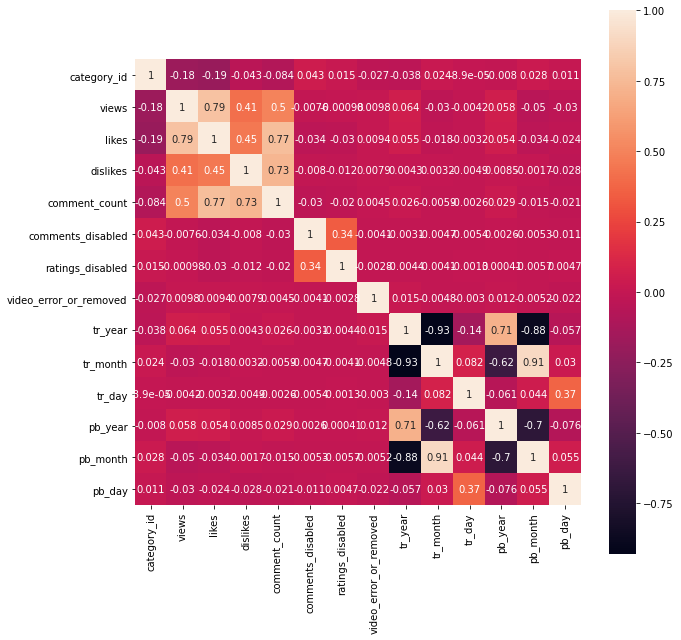

In [ ]:
corr = data.corr()
# print(corr)
fig, ax = plt.subplots(figsize=(10,10))
sns.heatmap(corr, ax = ax, square=True, annot=True)
# plt.show()

From the above correlation map, it can be seen that there is strong correlation between like and views and likes and comment_counts.

In [ ]:
# making trending year as an object data type as it has only two values
data['tr_year'] = data['tr_year'].astype('object')


##Data Visualization

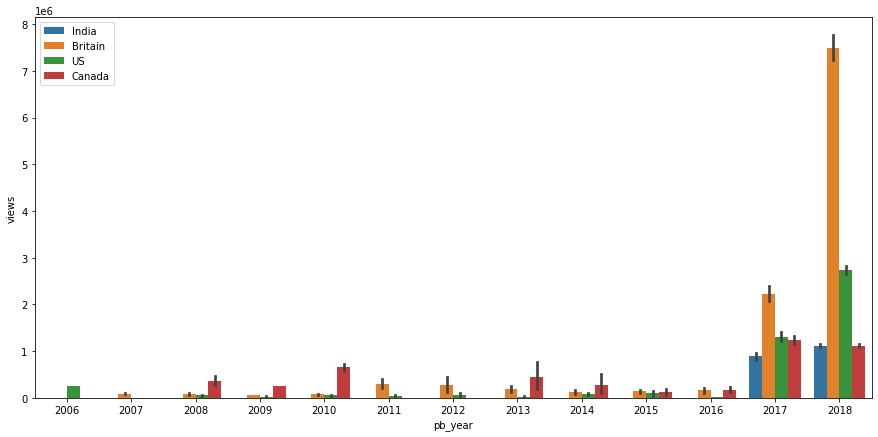

In [ ]:
# published year v/s views
br_plot = sns.barplot(x=data["pb_year"],y=data["views"], hue=data['country'])
br_plot = plt.gcf()
br_plot.set_size_inches(15,7)
plt.legend(loc='upper left')
# plt.show()

From the above graph, it can be seen that Britain has highest views in year 2017 and 2018.

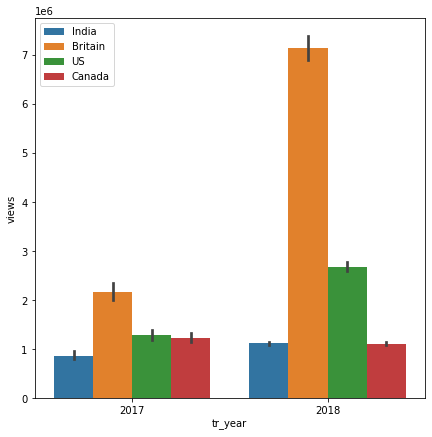

In [ ]:
# trending year v/s views
sns.barplot(x=data["tr_year"],y=data["views"] ,hue=data['country'])
br_plot = plt.gcf()
br_plot.set_size_inches(7,7)
plt.legend(loc='upper left')

From the above graph, it is seen that trending videos are maximum from Britain and next is from US.

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:7: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  import sys


,likes,dislikes,views,comment_count
pb_year,,,,
2006,459.000000,152.000000,2.585060e+05,82.000000
2007,351.216216,11.000000,9.186759e+04,79.297297
2008,400.474576,15.084746,1.008189e+05,79.305085
2009,208.250000,3.321429,5.224696e+04,30.785714
2010,843.571429,64.428571,1.008761e+05,104.196429
2011,734.919643,504.687500,2.344654e+05,330.767857
2012,714.948718,15.820513,1.395713e+05,65.897436
2013,748.408696,34.478261,1.441847e+05,67.147826
2014,856.759615,34.288462,1.230548e+05,124.096154


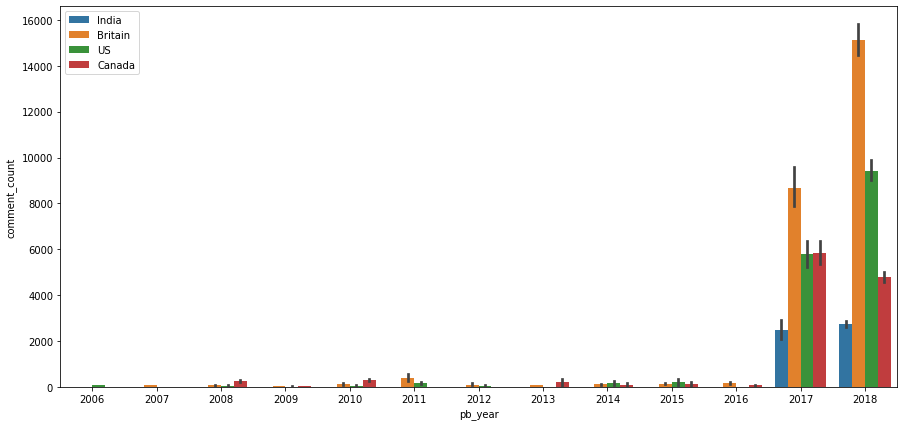

In [ ]:
# published year v/s comment_count grouped by likes, dislikes, views

sns.barplot(x=data["pb_year"],y=data["comment_count"], hue=data['country'])
br_plot = plt.gcf()
br_plot.set_size_inches(15,7)
plt.legend(loc='upper left')
data.groupby("pb_year")["likes","dislikes","views","comment_count"].mean()

In the above graph, comment_count is maximum in Britain. In 2017, the similar trend can be seen in US and Canada. India has almost same trend in both years. 

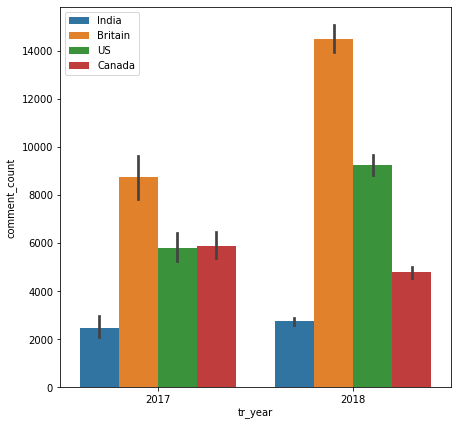

In [ ]:
# trending year v/s comment_count
sns.barplot(x=data["tr_year"],y=data["comment_count"] ,hue=data['country'])
br_plot = plt.gcf()
br_plot.set_size_inches(7,7)
plt.legend(loc='upper left')

In the above graph, highest comments on trending vedio is from Britain. 

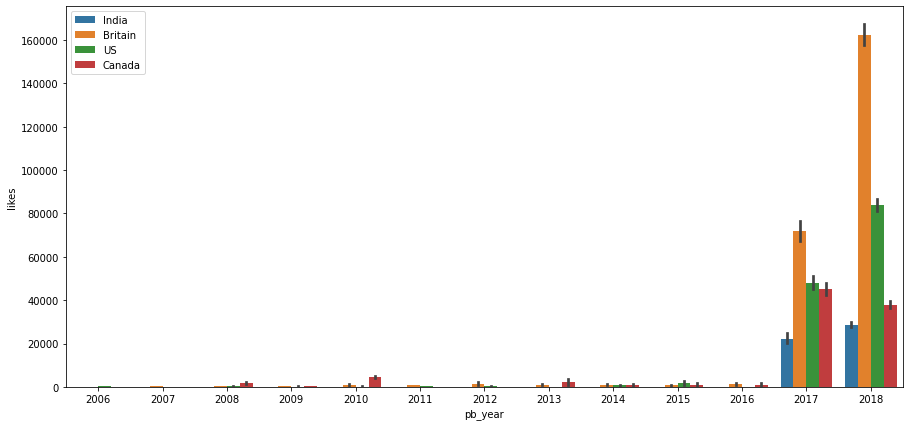

In [ ]:
# published year v/s likes
sns.barplot(x=data["pb_year"],y=data["likes"] ,hue=data['country'])
br_plot = plt.gcf()
br_plot.set_size_inches(15,7)
plt.legend(loc='upper left')

In the above graph, Britain has maximum likes when the video is published.

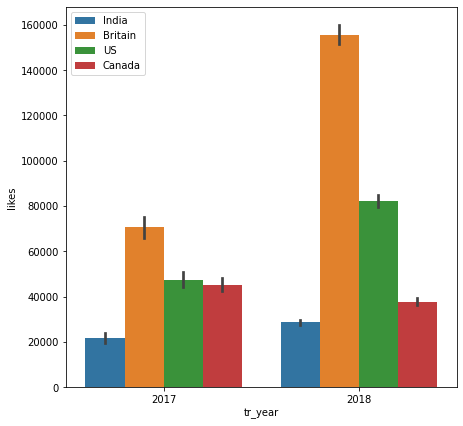

In [ ]:
# trending year v/s likes
sns.barplot(x=data["tr_year"],y=data["likes"] ,hue=data['country'])
br_plot = plt.gcf()
br_plot.set_size_inches(7,7)
plt.legend(loc='upper left')

From the above graph, it is seen that Britain has maximum likes as it is trending more.


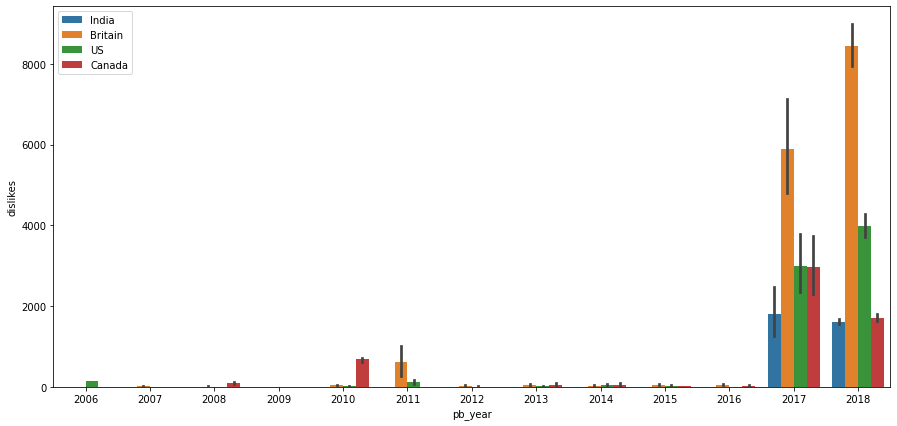

In [ ]:
# published year v/s dislikes
sns.barplot(x=data["pb_year"],y=data["dislikes"] ,hue=data['country'])
br_plot = plt.gcf()
br_plot.set_size_inches(15,7)
plt.legend(loc='upper left')

From the above graph, it can be seen that Britain has maximum dislikes.

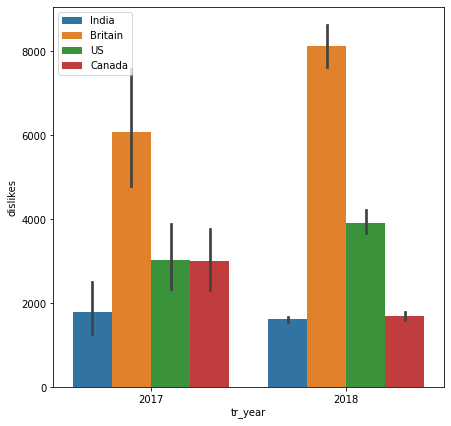

In [ ]:
# trending year v/s dislikes
sns.barplot(x=data["tr_year"],y=data["dislikes"] ,hue=data['country'])
br_plot = plt.gcf()
br_plot.set_size_inches(7,7)
plt.legend(loc='upper left')

From the above graph, trending year is maximum dislikes in Britain. It can be also shown that in 2017 the trend in US and Canada is similar.   

          views     likes
views  1.000000  0.790342
likes  0.790342  1.000000


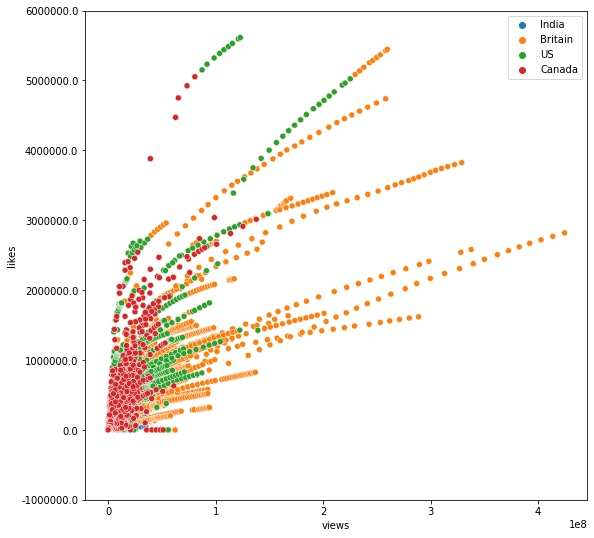

In [ ]:
# views v/s likes
data1 = data[['views', 'likes']]
corr = data1.corr()
print(corr)

sns1 = sns.scatterplot(x=data["views"], y=data["likes"], hue=data["country"])
plt.yticks(sns1.get_yticks(), sns1.get_yticks() * 1)
# plt.xticks(sns1.get_xticks(), sns1.get_xticks() * 10)
br_plot = plt.gcf()
br_plot.set_size_inches(9,9)
plt.legend(loc='upper right')

Observations:


Initially the likes grows proportionally to veiws.

However as the views surpases a limit/threshold, the likes become rarer.

Most videos can cross a threshold of 0.2 in views and 1000000 likes.

The curve follows the realtionship of:

            likes=K*Sqrt(views)

Where K can be in terms of millions/billions, depending on the reach of videos.

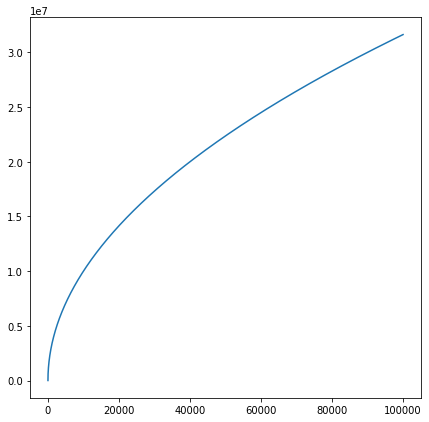

In [ ]:
K = 100000
x = np.arange(K)
y = K * np.sqrt(x)
plt.figure(figsize=(7,7))
plt.plot(x,y)

## Setting Environment of Spark

In [ ]:
pip install pyspark

In [ ]:
pip install findspark

In [ ]:
# install Java8
!apt-get install openjdk-8-jdk-headless -qq > /dev/null

In [ ]:
# download spark3.0.0
!wget -q https://downloads.apache.org/spark/spark-3.1.1/spark-3.1.1-bin-hadoop2.7.tgz

In [ ]:
!ls

drive  sample_data  spark-3.1.1-bin-hadoop2.7.tgz


In [ ]:
# unzip it
!tar xf spark-3.1.1-bin-hadoop2.7.tgz

In [ ]:
#install findspark 
!pip install -q findspark

In [ ]:
import os
os.environ["JAVA_HOME"] = "/usr/lib/jvm/java-8-openjdk-amd64"
os.environ["SPARK_HOME"] = "/content/spark-3.1.1-bin-hadoop2.7"

In [ ]:
import findspark
findspark.init()

In [ ]:
findspark.find()

'/content/spark-3.1.1-bin-hadoop2.7'

In [ ]:
# initializing spark env and configuration

from pyspark import SparkContext, SparkConf
from pyspark.sql import *

# create the session
conf = SparkConf().set("spark.ui.port", "4050")

# create the context
sc = SparkContext.getOrCreate(conf=conf)
#sc = pyspark.SparkContext(conf=conf)
spark = SparkSession.builder.master('local[*]').getOrCreate()

In [ ]:
spark

In [ ]:
!wget https://bin.equinox.io/c/4VmDzA7iaHb/ngrok-stable-linux-amd64.zip
!unzip ngrok-stable-linux-amd64.zip
get_ipython().system_raw('./ngrok http 4050 &')

--2021-04-14 13:09:57--  https://bin.equinox.io/c/4VmDzA7iaHb/ngrok-stable-linux-amd64.zip
Resolving bin.equinox.io (bin.equinox.io)... 54.226.184.31, 34.205.198.58, 3.229.173.44, ...
Connecting to bin.equinox.io (bin.equinox.io)|54.226.184.31|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 14746350 (14M) [application/octet-stream]
Saving to: ‘ngrok-stable-linux-amd64.zip’

ngrok-stable-linux- 100%[===================>]  14.06M  50.5MB/s    in 0.3s    

2021-04-14 13:09:58 (50.5 MB/s) - ‘ngrok-stable-linux-amd64.zip’ saved [14746350/14746350]

Archive:  ngrok-stable-linux-amd64.zip
  inflating: ngrok                   


In [ ]:
!curl -s http://localhost:4040/api/tunnels

{"tunnels":[],"uri":"/api/tunnels"}


##Spark Operations 

###creating spark dataframe from pandas dataframe

In [ ]:
# converting pandas dataframe into spark dataframe
df = spark.createDataFrame(data)
df.printSchema()

root
 |-- video_id: string (nullable = true)
 |-- trending_date: timestamp (nullable = true)
 |-- title: string (nullable = true)
 |-- channel_title: string (nullable = true)
 |-- category_id: long (nullable = true)
 |-- publish_time: timestamp (nullable = true)
 |-- tags: string (nullable = true)
 |-- views: long (nullable = true)
 |-- likes: long (nullable = true)
 |-- dislikes: long (nullable = true)
 |-- comment_count: long (nullable = true)
 |-- thumbnail_link: string (nullable = true)
 |-- comments_disabled: boolean (nullable = true)
 |-- ratings_disabled: boolean (nullable = true)
 |-- video_error_or_removed: boolean (nullable = true)
 |-- country: string (nullable = true)
 |-- tr_year: long (nullable = true)
 |-- tr_month: long (nullable = true)
 |-- tr_day: long (nullable = true)
 |-- pb_year: long (nullable = true)
 |-- pb_month: long (nullable = true)
 |-- pb_day: long (nullable = true)



In [ ]:
df.show(5)

+-----------+-------------------+--------------------+---------------+-----------+-------------------+--------------------+-------+-----+--------+-------------+--------------------+-----------------+----------------+----------------------+-------+-------+--------+------+-------+--------+------+
|   video_id|      trending_date|               title|  channel_title|category_id|       publish_time|                tags|  views|likes|dislikes|comment_count|      thumbnail_link|comments_disabled|ratings_disabled|video_error_or_removed|country|tr_year|tr_month|tr_day|pb_year|pb_month|pb_day|
+-----------+-------------------+--------------------+---------------+-----------+-------------------+--------------------+-------+-----+--------+-------------+--------------------+-----------------+----------------+----------------------+-------+-------+--------+------+-------+--------+------+
|kzwfHumJyYc|2017-11-14 00:00:00|Sharry Mann: Cute...|Lokdhun Punjabi|          1|2017-11-12 12:20:39|sharry man

###some pyspark SQL functions

In [ ]:
# count distinct channels
import pyspark.sql.functions
from pyspark.sql.functions import count, col, countDistinct

df.agg(pyspark.sql.functions.countDistinct("channel_title")).show()

+--------------------+
|count(channel_title)|
+--------------------+
|                8080|
+--------------------+



In [ ]:
# total number of video_id
df.agg(pyspark.sql.functions.countDistinct("video_id")).show()

+---------------+
|count(video_id)|
+---------------+
|          45154|
+---------------+



In [ ]:
# counting video_id according to channel_title in descending order

df.groupBy('channel_title', 'video_id').count().sort('count', ascending=False).show(5)

+--------------------+-----------+-----+
|       channel_title|   video_id|count|
+--------------------+-----------+-----+
|Marvel Entertainment|UUkn-enk2RU|   74|
|   SamSmithWorldVEVO|8h--kFui1JA|   70|
|        Disney•Pixar|i5qOzqD9Rms|   70|
| ChildishGambinoVEVO|VYOjWnS4cMY|   69|
|          Ed Sheeran|iWZmdoY1aTE|   67|
+--------------------+-----------+-----+
only showing top 5 rows



In [ ]:
df.select("channel_title","video_id","likes","dislikes", "country").sort('likes', ascending=False).show(5)

+-------------+-----------+-------+--------+-------+
|channel_title|   video_id|  likes|dislikes|country|
+-------------+-----------+-------+--------+-------+
|      ibighit|7C2z4GqqS5E|5613827|  206892|Britain|
|      ibighit|7C2z4GqqS5E|5613827|  206892|     US|
|      ibighit|7C2z4GqqS5E|5595203|  205565|Britain|
|      ibighit|7C2z4GqqS5E|5595203|  205565|     US|
|      ibighit|7C2z4GqqS5E|5530568|  200995|Britain|
+-------------+-----------+-------+--------+-------+
only showing top 5 rows



## Spark Queires

###importing libraries for spark SQL

In [ ]:
from pyspark.sql import SparkSession
from pyspark.sql.types import *

In [ ]:
# creating the temporary table view to query
df.createOrReplaceTempView("youtube")

####Find out what are the top video id with the maximum number of viewes according to date in desc and asc order. 



In [ ]:
 df2 = spark.sql('''select title,video_id, channel_title, views,trending_date, country from youtube group by  title, trending_date, video_id, channel_title, views, country order by views DESC''')
df2.show()

df2 = spark.sql('''select title,video_id, channel_title, views,trending_date, country from youtube group by  title, trending_date, video_id, channel_title, views, country order by views ''')
df2.show()

+--------------------+-----------+-------------+---------+-------------------+-------+
|               title|   video_id|channel_title|    views|      trending_date|country|
+--------------------+-----------+-------------+---------+-------------------+-------+
|Nicky Jam x J. Ba...|_I_D_8Z4sJE|   NickyJamTV|424538912|2018-04-07 00:00:00|Britain|
|Nicky Jam x J. Ba...|_I_D_8Z4sJE|   NickyJamTV|413586699|2018-04-06 00:00:00|Britain|
|Nicky Jam x J. Ba...|_I_D_8Z4sJE|   NickyJamTV|402650804|2018-04-05 00:00:00|Britain|
|Nicky Jam x J. Ba...|_I_D_8Z4sJE|   NickyJamTV|392036878|2018-04-04 00:00:00|Britain|
|Nicky Jam x J. Ba...|_I_D_8Z4sJE|   NickyJamTV|382401497|2018-04-03 00:00:00|Britain|
|Nicky Jam x J. Ba...|_I_D_8Z4sJE|   NickyJamTV|372399338|2018-04-02 00:00:00|Britain|
|Nicky Jam x J. Ba...|_I_D_8Z4sJE|   NickyJamTV|362111555|2018-04-01 00:00:00|Britain|
|Nicky Jam x J. Ba...|_I_D_8Z4sJE|   NickyJamTV|349987176|2018-03-31 00:00:00|Britain|
|Nicky Jam x J. Ba...|_I_D_8Z4sJE|   NickyJ

#### find out what are the top 20 channel_title trending day wise views

In [ ]:
df2 = spark.sql('''select * from youtube order BY views DESC''')
df2.show(20)

+-----------+-------------------+--------------------+-------------+-----------+-------------------+--------------------+---------+-------+--------+-------------+--------------------+-----------------+----------------+----------------------+-------+-------+--------+------+-------+--------+------+
|   video_id|      trending_date|               title|channel_title|category_id|       publish_time|                tags|    views|  likes|dislikes|comment_count|      thumbnail_link|comments_disabled|ratings_disabled|video_error_or_removed|country|tr_year|tr_month|tr_day|pb_year|pb_month|pb_day|
+-----------+-------------------+--------------------+-------------+-----------+-------------------+--------------------+---------+-------+--------+-------------+--------------------+-----------------+----------------+----------------------+-------+-------+--------+------+-------+--------+------+
|_I_D_8Z4sJE|2018-04-07 00:00:00|Nicky Jam x J. Ba...|   NickyJamTV|         10|2018-03-02 05:00:19|Bad Bu

####Top 10 monthly trending videos

In [ ]:
# Top 10 monthly trending videos

df3 = spark.sql('''select  channel_title,  max(likes), min(dislikes), trending_date from youtube GROUP BY channel_title, trending_date  ''')
df3.show(10)


+--------------------+----------+-------------+-------------------+
|       channel_title|max(likes)|min(dislikes)|      trending_date|
+--------------------+----------+-------------+-------------------+
|      V6 News Telugu|      2487|          219|2017-11-14 00:00:00|
|   Eagle Media Works|        88|           59|2017-11-15 00:00:00|
|   Comedy Central UK|      2924|           17|2017-11-15 00:00:00|
|BollywoodHungama.com|       619|           31|2017-11-16 00:00:00|
|       Speed Records|    165324|         1240|2017-11-17 00:00:00|
|           FilmiBeat|       341|           58|2017-11-17 00:00:00|
|    The Screen Patti|     15545|         1303|2017-11-18 00:00:00|
|         Black Sheep|     13682|          651|2017-11-18 00:00:00|
|             NOIX TV|      2957|         1095|2017-11-19 00:00:00|
|        Humble Music|      6428|          335|2017-11-19 00:00:00|
+--------------------+----------+-------------+-------------------+
only showing top 10 rows



In [ ]:
# Top 20 videos with largest number of dislikes.

df4 = spark.sql('''select channel_title, video_id, dislikes, trending_date, country  from youtube GROUP BY channel_title, video_id, dislikes, trending_date, country ORDER BY dislikes DESC''')
df4.show()

+-----------------+-----------+--------+-------------------+-------+
|    channel_title|   video_id|dislikes|      trending_date|country|
+-----------------+-----------+--------+-------------------+-------+
| Logan Paul Vlogs|QwZT7T-TXT0| 1944971|2018-01-18 00:00:00|Britain|
| Logan Paul Vlogs|QwZT7T-TXT0| 1928677|2018-01-17 00:00:00|Britain|
| Logan Paul Vlogs|QwZT7T-TXT0| 1911836|2018-01-16 00:00:00|Britain|
| Logan Paul Vlogs|QwZT7T-TXT0| 1890743|2018-01-15 00:00:00|Britain|
| Logan Paul Vlogs|QwZT7T-TXT0| 1868756|2018-01-14 00:00:00|Britain|
| Logan Paul Vlogs|QwZT7T-TXT0| 1843521|2018-01-13 00:00:00|Britain|
| Logan Paul Vlogs|QwZT7T-TXT0| 1802219|2018-01-12 00:00:00|Britain|
|YouTube Spotlight|FlsCjmMhFmw| 1753274|2017-12-24 00:00:00|Britain|
|YouTube Spotlight|FlsCjmMhFmw| 1739579|2017-12-23 00:00:00|Britain|
|YouTube Spotlight|FlsCjmMhFmw| 1732859|2017-12-22 00:00:00|Britain|
|YouTube Spotlight|FlsCjmMhFmw| 1727826|2017-12-21 00:00:00|Britain|
|YouTube Spotlight|FlsCjmMhFmw| 17

####top viewd channels daywise grouped by month

In [ ]:
# top viewd channels daywise grouped by month

df4 = spark.sql('''select channel_title, views, tr_day, tr_month, tr_year, publish_time  from youtube GROUP BY channel_title, views, tr_month, tr_day, tr_year, publish_time order BY views DESC''')
df4.show()

+-------------+---------+------+--------+-------+-------------------+
|channel_title|    views|tr_day|tr_month|tr_year|       publish_time|
+-------------+---------+------+--------+-------+-------------------+
|   NickyJamTV|424538912|     7|       4|   2018|2018-03-02 05:00:19|
|   NickyJamTV|413586699|     6|       4|   2018|2018-03-02 05:00:19|
|   NickyJamTV|402650804|     5|       4|   2018|2018-03-02 05:00:19|
|   NickyJamTV|392036878|     4|       4|   2018|2018-03-02 05:00:19|
|   NickyJamTV|382401497|     3|       4|   2018|2018-03-02 05:00:19|
|   NickyJamTV|372399338|     2|       4|   2018|2018-03-02 05:00:19|
|   NickyJamTV|362111555|     1|       4|   2018|2018-03-02 05:00:19|
|   NickyJamTV|349987176|    31|       3|   2018|2018-03-02 05:00:19|
|   NickyJamTV|339629489|    30|       3|   2018|2018-03-02 05:00:19|
|Flow La Movie|337621571|    18|       5|   2018|2018-04-11 22:00:00|
|    Bad Bunny|328860380|    23|       3|   2018|2018-02-15 00:00:03|
|Flow La Movie|32802

From the above it can be seen that, to come in *trending* video it takes around a month since its published date. 

##Machine Learning Modeling

###predicting likes on the basis of views, comment counts and dislikes

####finding important features from the given dataset

#####creating new **features** dataframe which contains the variables which are needed to train the model and predict

In [ ]:
# making copy of original dataframe
data_copy = df
data_copy.show(10)

+-----------+-------------------+--------------------+----------------+-----------+-------------------+--------------------+--------+------+--------+-------------+--------------------+-----------------+----------------+----------------------+-------+-------+--------+------+-------+--------+------+
|   video_id|      trending_date|               title|   channel_title|category_id|       publish_time|                tags|   views| likes|dislikes|comment_count|      thumbnail_link|comments_disabled|ratings_disabled|video_error_or_removed|country|tr_year|tr_month|tr_day|pb_year|pb_month|pb_day|
+-----------+-------------------+--------------------+----------------+-----------+-------------------+--------------------+--------+------+--------+-------------+--------------------+-----------------+----------------+----------------------+-------+-------+--------+------+-------+--------+------+
|kzwfHumJyYc|2017-11-14 00:00:00|Sharry Mann: Cute...| Lokdhun Punjabi|          1|2017-11-12 12:20:39|

In [ ]:
# drop unwanted columns
data_copy=data_copy.drop("tags","description","title","channel_title","publish_time","video_id","thumbnail_link","trending_date")

In [ ]:
data_copy.show(10)

+-----------+--------+------+--------+-------------+-----------------+----------------+----------------------+-------+-------+--------+------+-------+--------+------+
|category_id|   views| likes|dislikes|comment_count|comments_disabled|ratings_disabled|video_error_or_removed|country|tr_year|tr_month|tr_day|pb_year|pb_month|pb_day|
+-----------+--------+------+--------+-------------+-----------------+----------------+----------------------+-------+-------+--------+------+-------+--------+------+
|          1| 1096327| 33966|     798|          882|            false|           false|                 false|  India|   2017|      11|    14|   2017|      11|    12|
|         25|  590101|   735|     904|            0|             true|           false|                 false|  India|   2017|      11|    14|   2017|      11|    13|
|         24|  473988|  2011|     243|          149|            false|           false|                 false|  India|   2017|      11|    14|   2017|      11|    12

In [ ]:
len(df.columns)

22

In [ ]:
# changing datatypes of columns

from pyspark.sql.types import IntegerType

#data_copy["comments_disabled"]=(data_copy["comments_disabled"]=="true").cast(IntegerType())
data_copy = data_copy.withColumn("comments_disabled1", data_copy["comments_disabled"].cast(IntegerType()))
data_copy = data_copy.withColumn("ratings_disabled1", data_copy["ratings_disabled"].cast(IntegerType()))
data_copy = data_copy.withColumn("video_error_or_removed1", data_copy["video_error_or_removed"].cast(IntegerType()))


In [ ]:
# dropping columnns which is tyoe casted and now it is not needed
data_copy = data_copy.drop('comments_disabled', 'ratings_disabled', 'video_error_or_removed')

In [ ]:
# final dataframe 
data_copy.show(5)

+-----------+-------+-----+--------+-------------+-------+-------+--------+------+-------+--------+------+------------------+-----------------+-----------------------+
|category_id|  views|likes|dislikes|comment_count|country|tr_year|tr_month|tr_day|pb_year|pb_month|pb_day|comments_disabled1|ratings_disabled1|video_error_or_removed1|
+-----------+-------+-----+--------+-------------+-------+-------+--------+------+-------+--------+------+------------------+-----------------+-----------------------+
|          1|1096327|33966|     798|          882|  India|   2017|      11|    14|   2017|      11|    12|                 0|                0|                      0|
|         25| 590101|  735|     904|            0|  India|   2017|      11|    14|   2017|      11|    13|                 1|                0|                      0|
|         24| 473988| 2011|     243|          149|  India|   2017|      11|    14|   2017|      11|    12|                 0|                0|                 

In [ ]:
# filtering US data and model on it
data_copy_US = data_copy.filter((col("country") == 'US'))
data_copy_US.show()

+-----------+-------+------+--------+-------------+-------+-------+--------+------+-------+--------+------+------------------+-----------------+-----------------------+
|category_id|  views| likes|dislikes|comment_count|country|tr_year|tr_month|tr_day|pb_year|pb_month|pb_day|comments_disabled1|ratings_disabled1|video_error_or_removed1|
+-----------+-------+------+--------+-------------+-------+-------+--------+------+-------+--------+------+------------------+-----------------+-----------------------+
|         22| 748374| 57527|    2966|        15954|     US|   2017|      11|    14|   2017|      11|    13|                 0|                0|                      0|
|         24|2418783| 97185|    6146|        12703|     US|   2017|      11|    14|   2017|      11|    13|                 0|                0|                      0|
|         23|3191434|146033|    5339|         8181|     US|   2017|      11|    14|   2017|      11|    12|                 0|                0|           

In [ ]:
# get the rows where comments are not disabled, so comment count will not be 0
data_copy_US = data_copy_US.filter((col("comments_disabled1") != 1))
data_copy_US.show()

+-----------+-------+------+--------+-------------+-------+-------+--------+------+-------+--------+------+------------------+-----------------+-----------------------+
|category_id|  views| likes|dislikes|comment_count|country|tr_year|tr_month|tr_day|pb_year|pb_month|pb_day|comments_disabled1|ratings_disabled1|video_error_or_removed1|
+-----------+-------+------+--------+-------------+-------+-------+--------+------+-------+--------+------+------------------+-----------------+-----------------------+
|         22| 748374| 57527|    2966|        15954|     US|   2017|      11|    14|   2017|      11|    13|                 0|                0|                      0|
|         24|2418783| 97185|    6146|        12703|     US|   2017|      11|    14|   2017|      11|    13|                 0|                0|                      0|
|         23|3191434|146033|    5339|         8181|     US|   2017|      11|    14|   2017|      11|    12|                 0|                0|           

In [ ]:
# get the rows where ratings are not disabled, so ratings will not be 0
data_copy_US = data_copy_US.filter((col("ratings_disabled1") != 1))
data_copy_US.show()

+-----------+-------+------+--------+-------------+-------+-------+--------+------+-------+--------+------+------------------+-----------------+-----------------------+
|category_id|  views| likes|dislikes|comment_count|country|tr_year|tr_month|tr_day|pb_year|pb_month|pb_day|comments_disabled1|ratings_disabled1|video_error_or_removed1|
+-----------+-------+------+--------+-------------+-------+-------+--------+------+-------+--------+------+------------------+-----------------+-----------------------+
|         22| 748374| 57527|    2966|        15954|     US|   2017|      11|    14|   2017|      11|    13|                 0|                0|                      0|
|         24|2418783| 97185|    6146|        12703|     US|   2017|      11|    14|   2017|      11|    13|                 0|                0|                      0|
|         23|3191434|146033|    5339|         8181|     US|   2017|      11|    14|   2017|      11|    12|                 0|                0|           

In [ ]:
# get the rows where video is not removed or has no error
data_copy_US = data_copy_US.filter((col("video_error_or_removed1") != 1))
data_copy_US.show()

+-----------+-------+------+--------+-------------+-------+-------+--------+------+-------+--------+------+------------------+-----------------+-----------------------+
|category_id|  views| likes|dislikes|comment_count|country|tr_year|tr_month|tr_day|pb_year|pb_month|pb_day|comments_disabled1|ratings_disabled1|video_error_or_removed1|
+-----------+-------+------+--------+-------------+-------+-------+--------+------+-------+--------+------+------------------+-----------------+-----------------------+
|         22| 748374| 57527|    2966|        15954|     US|   2017|      11|    14|   2017|      11|    13|                 0|                0|                      0|
|         24|2418783| 97185|    6146|        12703|     US|   2017|      11|    14|   2017|      11|    13|                 0|                0|                      0|
|         23|3191434|146033|    5339|         8181|     US|   2017|      11|    14|   2017|      11|    12|                 0|                0|           

In [ ]:
# final dataframe for US
data_copy_US.show(5)

+-----------+-------+------+--------+-------------+-------+-------+--------+------+-------+--------+------+------------------+-----------------+-----------------------+
|category_id|  views| likes|dislikes|comment_count|country|tr_year|tr_month|tr_day|pb_year|pb_month|pb_day|comments_disabled1|ratings_disabled1|video_error_or_removed1|
+-----------+-------+------+--------+-------------+-------+-------+--------+------+-------+--------+------+------------------+-----------------+-----------------------+
|         22| 748374| 57527|    2966|        15954|     US|   2017|      11|    14|   2017|      11|    13|                 0|                0|                      0|
|         24|2418783| 97185|    6146|        12703|     US|   2017|      11|    14|   2017|      11|    13|                 0|                0|                      0|
|         23|3191434|146033|    5339|         8181|     US|   2017|      11|    14|   2017|      11|    12|                 0|                0|           

In [ ]:
# shape of that dataframe
print((data_copy_US.count(), len(data_copy_US.columns)))

(40230, 15)


In [ ]:
# checking whether the data contains null or not


print(data_copy_US.where(col("likes").isNull()).count())
print(data_copy_US.where(col("dislikes").isNull()).count())
print(data_copy_US.where(col("comment_count").isNull()).count())
print(data_copy_US.where(col("views").isNull()).count())

0
0
0
0


In [ ]:
# creating new dataframe called features to train the model


features_data_US = data_copy_US.select(col('views'), col('likes'), col('dislikes'), col('comment_count'))

In [ ]:
features_data_US.show(5)

+-------+------+--------+-------------+
|  views| likes|dislikes|comment_count|
+-------+------+--------+-------------+
| 748374| 57527|    2966|        15954|
|2418783| 97185|    6146|        12703|
|3191434|146033|    5339|         8181|
| 343168| 10172|     666|         2146|
|2095731|132235|    1989|        17518|
+-------+------+--------+-------------+
only showing top 5 rows



In [ ]:
required_features = ['views',
 'dislikes',
 'comment_count']
                   
from pyspark.ml.feature import VectorAssembler

assembler = VectorAssembler(inputCols=required_features, outputCol='features')
transformed_data = assembler.transform(features_data_US)
transformed_data = transformed_data.select(['features', 'likes'])
transformed_data.show(5)

+--------------------+------+
|            features| likes|
+--------------------+------+
|[748374.0,2966.0,...| 57527|
|[2418783.0,6146.0...| 97185|
|[3191434.0,5339.0...|146033|
|[343168.0,666.0,2...| 10172|
|[2095731.0,1989.0...|132235|
+--------------------+------+
only showing top 5 rows



####splitting into train and test

In [ ]:
train, test = transformed_data.randomSplit([0.7, 0.3],seed = 7)

In [ ]:
train.describe().show()

+-------+-----------------+
|summary|            likes|
+-------+-----------------+
|  count|            28256|
|   mean|75275.25360985278|
| stddev|225883.8731095314|
|    min|                0|
|    max|          5613827|
+-------+-----------------+



In [ ]:
test.describe().show()

+-------+------------------+
|summary|             likes|
+-------+------------------+
|  count|             11974|
|   mean| 75118.84842158009|
| stddev|241868.95607480116|
|    min|                 1|
|    max|           5530568|
+-------+------------------+



### Linear Regression

In [ ]:
from pyspark.ml.regression import LinearRegression
lr = LinearRegression(featuresCol ='features', labelCol ='likes')
lr_model = lr.fit(train)
train_results = lr_model.evaluate(train)
print('Train Accuracy :', train_results.r2)
  
 
# evaluate model on test_data
test_results = lr_model.evaluate(test)
print('Test Accuracy :', test_results.r2)
  
    
# create unlabelled data from test_data
# test_data.show()
unlabeled_data = test.select('features')
unlabeled_data.show(5)

Train Accuracy : 0.878051859455062
Test Accuracy : 0.9085855676505346
+-----------------+
|         features|
+-----------------+
|  [773.0,0.0,0.0]|
|  [999.0,1.0,1.0]|
|[1095.0,2.0,13.0]|
| [1204.0,0.0,2.0]|
| [1387.0,1.0,1.0]|
+-----------------+
only showing top 5 rows



In [ ]:
predictions = lr_model.transform(unlabeled_data)
predictions.show(5)

+-----------------+------------------+
|         features|        prediction|
+-----------------+------------------+
|  [773.0,0.0,0.0]| 6650.452640013833|
|  [999.0,1.0,1.0]| 6656.313729827621|
|[1095.0,2.0,13.0]| 6702.245803139771|
| [1204.0,0.0,2.0]|6666.1031878607955|
| [1387.0,1.0,1.0]| 6663.452593058196|
+-----------------+------------------+
only showing top 5 rows



### Regression on entire data

In [ ]:
# creating new dataframe called features to train the model

features_data = data_copy.select(col('views'), col('likes'), col('dislikes'), col('comment_count'))
features_data.show(5)

+-------+-----+--------+-------------+
|  views|likes|dislikes|comment_count|
+-------+-----+--------+-------------+
|1096327|33966|     798|          882|
| 590101|  735|     904|            0|
| 473988| 2011|     243|          149|
|1242680|70353|    1624|         2684|
| 464015|  492|     293|           66|
+-------+-----+--------+-------------+
only showing top 5 rows



In [ ]:
required_features = ['views', 'dislikes', 'comment_count']
                   
from pyspark.ml.feature import VectorAssembler

assembler = VectorAssembler(inputCols=required_features, outputCol='features')
transformed_data = assembler.transform(features_data)
transformed_data = transformed_data.select(['features', 'likes'])
transformed_data.show(5)

+--------------------+-----+
|            features|likes|
+--------------------+-----+
|[1096327.0,798.0,...|33966|
|[590101.0,904.0,0.0]|  735|
|[473988.0,243.0,1...| 2011|
|[1242680.0,1624.0...|70353|
|[464015.0,293.0,6...|  492|
+--------------------+-----+
only showing top 5 rows



In [ ]:
train, test = transformed_data.randomSplit([0.7, 0.3],seed = 7)

In [ ]:
train.describe().show()

+-------+------------------+
|summary|             likes|
+-------+------------------+
|  count|            110841|
|   mean|  69253.5876706273|
| stddev|230534.03533562756|
|    min|                 0|
|    max|           5613827|
+-------+------------------+



In [ ]:
test.describe().show(5)

+-------+------------------+
|summary|             likes|
+-------+------------------+
|  count|             47257|
|   mean| 68344.30410309584|
| stddev|223603.05374788173|
|    min|                 0|
|    max|           5595203|
+-------+------------------+



In [ ]:
from pyspark.ml.regression import LinearRegression
lr = LinearRegression(featuresCol ='features', labelCol ='likes')
lr_model = lr.fit(train)
train_results = lr_model.evaluate(train)
print('Train Accuracy :', train_results.r2)
  
# evaluate model on test_data
test_results = lr_model.evaluate(test)
print('Test Accuracy :', test_results.r2)

# test_results.predictions.show()
  
# create unlabelled data from test_data
unlabeled_data = test.select('features')
unlabeled_data.show(5)

Train Accuracy : 0.854856143900019
Test Accuracy : 0.858485937669675
+---------------+
|       features|
+---------------+
|[773.0,0.0,0.0]|
|[920.0,1.0,1.0]|
|[937.0,0.0,3.0]|
|[972.0,0.0,3.0]|
|[983.0,0.0,3.0]|
+---------------+
only showing top 5 rows



In [ ]:
predictions = lr_model.transform(unlabeled_data)
predictions.show(5)

+---------------+------------------+
|       features|        prediction|
+---------------+------------------+
|[773.0,0.0,0.0]|10769.639089654289|
|[920.0,1.0,1.0]|10774.015568556737|
|[937.0,0.0,3.0]|10785.767379550884|
|[972.0,0.0,3.0]|  10786.1884806723|
|[983.0,0.0,3.0]|10786.320826739031|
+---------------+------------------+
only showing top 5 rows



###Britain Regression

In [ ]:
# filtering US data and model on it
data_copy_Britain = data_copy.filter((col("country") == 'Britain'))
data_copy_Britain.show()

+-----------+--------+-------+--------+-------------+-------+-------+--------+------+-------+--------+------+------------------+-----------------+-----------------------+
|category_id|   views|  likes|dislikes|comment_count|country|tr_year|tr_month|tr_day|pb_year|pb_month|pb_day|comments_disabled1|ratings_disabled1|video_error_or_removed1|
+-----------+--------+-------+--------+-------------+-------+-------+--------+------+-------+--------+------+------------------+-----------------+-----------------------+
|         26| 7224515|  55681|   10247|         9479|Britain|   2017|      11|    14|   2017|      11|    10|                 0|                0|                      0|
|         24| 1053632|  25561|    2294|         2757|Britain|   2017|      11|    14|   2017|      11|    12|                 0|                0|                      0|
|         10|17158579| 787420|   43420|       125882|Britain|   2017|      11|    14|   2017|      11|    10|                 0|                0

In [ ]:
# get the rows where comments are not disabled, so comment count will not be 0
data_copy_Britain = data_copy_Britain.filter((col("comments_disabled1") != 1))


In [ ]:
# get the rows where ratings are not disabled, so ratings will not be 0
data_copy_Britain = data_copy_Britain.filter((col("ratings_disabled1") != 1))


In [ ]:
# get the rows where video is not removed or has no error
data_copy_Britain = data_copy_Britain.filter((col("video_error_or_removed1") != 1))


In [ ]:
# creating new dataframe called features to train the model

features_data_Britain = data_copy_Britain.select(col('views'), col('likes'), col('dislikes'), col('comment_count'))
features_data_Britain.show(5)

+--------+------+--------+-------------+
|   views| likes|dislikes|comment_count|
+--------+------+--------+-------------+
| 7224515| 55681|   10247|         9479|
| 1053632| 25561|    2294|         2757|
|17158579|787420|   43420|       125882|
|   27833|   193|      12|           37|
|    9815|    30|       2|           30|
+--------+------+--------+-------------+
only showing top 5 rows



In [ ]:
features_data_Britain.describe().show()

+-------+--------------------+------------------+------------------+------------------+
|summary|               views|             likes|          dislikes|     comment_count|
+-------+--------------------+------------------+------------------+------------------+
|  count|               38116|             38116|             38116|             38116|
|   mean|   5926423.644794837|136518.24916045755| 7658.098515059292|13328.725574561864|
| stddev|1.9105739433874235E7|352994.12053208664|51431.758287840086|51148.659441043106|
|    min|                 851|                 2|                 0|                 0|
|    max|           424538912|           5613827|           1944971|           1626501|
+-------+--------------------+------------------+------------------+------------------+



In [ ]:
required_features = ['views',
 'dislikes',
 'comment_count']
                   
from pyspark.ml.feature import VectorAssembler

assembler = VectorAssembler(inputCols=required_features, outputCol='features')
transformed_data = assembler.transform(features_data_Britain)
transformed_data = transformed_data.select(['features', 'likes'])
transformed_data.show(5)

+--------------------+------+
|            features| likes|
+--------------------+------+
|[7224515.0,10247....| 55681|
|[1053632.0,2294.0...| 25561|
|[1.7158579E7,4342...|787420|
| [27833.0,12.0,37.0]|   193|
|   [9815.0,2.0,30.0]|    30|
+--------------------+------+
only showing top 5 rows



In [ ]:
train, test = transformed_data.randomSplit([0.7, 0.3],seed = 7)

In [ ]:
from pyspark.ml.regression import LinearRegression
lr = LinearRegression(featuresCol ='features', labelCol ='likes')
lr_model = lr.fit(train)
train_results = lr_model.evaluate(train)
print('Train Accuracy :', train_results.r2)
  
  
# evaluate model on test_data
test_results = lr_model.evaluate(test)
print('Test Accuracy :', test_results.r2)
  
  
# create unlabelled data from test_data
# test_data.show()
unlabeled_data = test.select('features')
unlabeled_data.show(5)

Train Accuracy : 0.8726133425245184
Test Accuracy : 0.8510726301296094
+----------------+
|        features|
+----------------+
| [922.0,0.0,3.0]|
| [983.0,0.0,3.0]|
|[1184.0,0.0,1.0]|
|[1208.0,0.0,1.0]|
|[1218.0,0.0,1.0]|
+----------------+
only showing top 5 rows



In [ ]:
predictions = lr_model.transform(unlabeled_data)
predictions.show(5)

+----------------+------------------+
|        features|        prediction|
+----------------+------------------+
| [922.0,0.0,3.0]|21748.354124225807|
| [983.0,0.0,3.0]|21749.019453079356|
|[1184.0,0.0,1.0]|21740.858527734003|
|[1208.0,0.0,1.0]| 21741.12029646327|
|[1218.0,0.0,1.0]| 21741.22936676713|
+----------------+------------------+
only showing top 5 rows

